In [1]:
from collections import namedtuple

PlayerEntry = namedtuple('PlayerEntry', 'timestamp playerid rank')

In [2]:
from uuid import uuid4
from datetime import datetime, timedelta

rank_names = ['bronze', 'silver', 'gold', 'platinum',
              'diamond', 'master', 'grandmaster']
rank_sizes = [0.08, 0.21, 0.32, 0.25, 0.10, 0.03, 0.01]

stime = datetime.now()
etime = stime + timedelta(hours=1)
total_entries = 1000


In [3]:
from random import randrange
import random

def create_rand_entry(start_time, end_time):
    dtime = end_time - start_time
    rtime = randrange(0, dtime.seconds)
    timestamp = start_time + timedelta(seconds=rtime)
    playerid = uuid4().hex
    rank = random.choices(rank_names, rank_sizes)

    return PlayerEntry(timestamp, playerid, rank[0])

create_rand_entry(stime, etime)

PlayerEntry(timestamp=datetime.datetime(2023, 5, 27, 23, 37, 19, 718833), playerid='4e83eed63cd748de9b9141dbf9da8538', rank='silver')

In [4]:
from queue import PriorityQueue

player_queue = PriorityQueue(0)

for i in range(total_entries):
    e = create_rand_entry(stime, etime)
    player_queue.put(e)

In [5]:
matched = list()
# cache for each rank
match_rank = dict(zip(rank_names, [[],[],[],[],[],[],[]]))

while not player_queue.empty():
    p = player_queue.get()
    # we check if there is already another player with the same rank
    if match_rank[p.rank] == []:
        # save player to our cache
        match_rank[p.rank].append(p)
    else:
        # remove the player on the cache and match it with the new found player
        matched.append((match_rank[p.rank].pop(), p))

In [6]:
for r in rank_names:
    if match_rank[r] != []:
        print("not matched: %s" % r)

not matched: bronze
not matched: silver
not matched: gold
not matched: grandmaster


In [7]:
wait_times = [(p2.timestamp - p1.timestamp).seconds for p1, p2 in matched]

max(wait_times)

1339

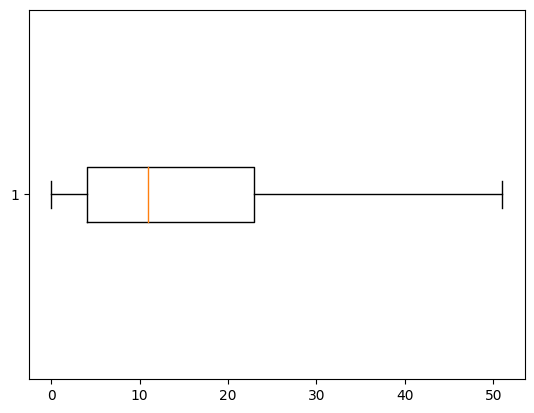

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(wait_times, vert=False, showfliers=False)

plt.show()

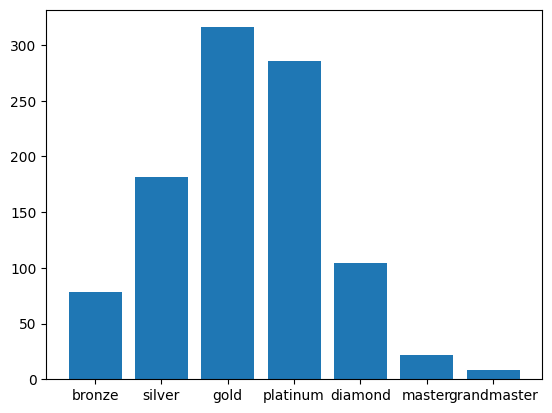

In [9]:
rank_count = dict(zip(rank_names,[0,0,0,0,0,0,0]))

for (p1, p2) in matched:
    rank_count[p1.rank] += 1
    rank_count[p2.rank] += 1

fig, ax = plt.subplots()
ax.bar(rank_count.keys(), rank_count.values())
plt.show();


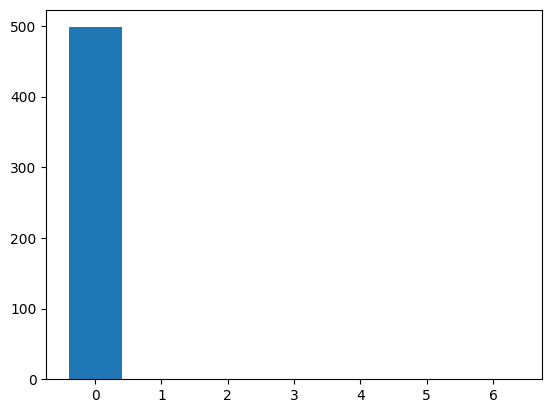

In [10]:
rank_id = dict(zip(rank_names,[0,1,2,3,4,5,6]))
rank_diff = dict(zip([0,1,2,3,4,5,6], [0,0,0,0,0,0,0]))

for (p1, p2) in matched:
    p1_id = rank_id[p1.rank]
    p2_id = rank_id[p2.rank]
    rank_diff[abs(p1_id - p2_id)] += 1

fig, ax = plt.subplots()
ax.bar(rank_diff.keys(), rank_diff.values())
plt.show();